# Pre-Modelling

**Mounting Colab notebook to Drive**

In [ ]:
# Mounting colab notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Installing relevant packages + importing common modules* **(AI-FEYNMAN)**

In [ ]:
# Installing AI Feynman 2.0, c shell, and relevant packages
## https://ai-feynman.readthedocs.io/en/latest/
!pip install aifeynman

     |████████████████████████████████| 219 kB 4.2 MB/s 
  Created wheel for aifeynman: filename=aifeynman-2.0.7-cp37-cp37m-linux_x86_64.whl size=863113 sha256=5aede364a2fea0f914c2f47d946b8a5e378100d2fef0f7785e627018ba08614a
  Stored in directory: /root/.cache/pip/wheels/c3/51/dc/f385966c690f4ae7b645205b5effcb67fd6eccef022053b0fe
Successfully built aifeynman


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import torch 

import aifeynman

#Configuring matplotlib
%matplotlib inline

*Installing Julia + relevant packages + importing common modules* **(PYSR)**

In [ ]:
# JULIA INSTALLATION
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi


Installing Julia 1.6.0 on the current Colab Runtime...
2021-12-19 03:23:25 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


In [ ]:
!pip install pysr
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time

from pysr import pysr, best

#Configuring matplotlib
%matplotlib inline

*Installing relevant packages + importing common modules* **(GPLEARN)**

In [ ]:
# Installing gplearn
# https://gplearn.readthedocs.io/en/stable/installation.html
!pip install gplearn

     |████████████████████████████████| 41 kB 285 kB/s 


In [ ]:
# Importing relevant modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time

from gplearn.genetic import SymbolicRegressor

#Configuring matplotlib
%matplotlib inline

# Lotka-Volterra Modelling

*Initialising data collection*

In [ ]:
# model parameters
a = np.linspace(0.3, 0.9, num=4)
b = np.linspace(0.3, 0.9, num=4)     ## prey parameters a - 0.3-0.9, b - 0.3-0.9. Init
c = 0.3
e = 0.2    ## predator parameters c - 0.1-0.7, b - 0.1-0.7
dt = 0.1; max_time = 100    ## time parameters

## Original - a = 0.7, b = 0.5, c = 0.3, d = 0.2

# initial time and populations
t = 0; x = 1.0; y = 0.5     ## generally y < x

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []
a_list = []; b_list = []

# initialize lists
#t_list.append(t)
#x_list.append(x)
#y_list.append(y)

In [ ]:
#a_loop = np.repeat(a,100000)
#b_loop = np.repeat(b,100000)

#print(a_loop.shape)

*Data collection*

In [ ]:
# while loop for data collection

for i in range(len(a)):
  for j in range(len(b)):

    t = 0; x = 1.0; y = 0.5   
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)
    a_list.append(a[i])
    b_list.append(b[j])   

    while t < max_time:
    # code for time passing, setting up 'r' to facilitate iteration through a, b, c, e lists
      t = t + dt

    # Calculating x and y relative to t
      x = x + (a[i]*x - b[j]*x*y)*dt
      y = y + (-c*y + e*x*y)*dt

    # store new values in new lists
      t_list.append(t)
      x_list.append(x)
      y_list.append(y)
      a_list.append(a[i])
      b_list.append(b[j]) 

In [ ]:
print(len(a_list))

16032


*Plotting data*

1000


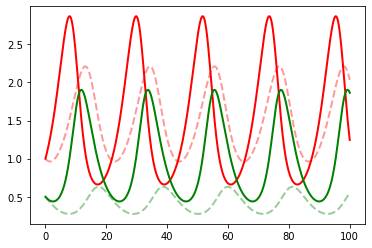

In [ ]:
# Plot the results    
nt = int(max_time/dt)
i = 3
print(nt)
p = plt.plot(t_list[0:nt+1], x_list[0:nt+1], 'r', t_list[0:nt+1], y_list[0:nt+1], 'g', linewidth = 2)
p = plt.plot(t_list[((i-1)*(nt+2)):(i*(nt+2)-1)], x_list[((i-1)*(nt+2)):(i*(nt+2)-1)], 'r--', t_list[((i-1)*(nt+2)):(i*(nt+2)-1)], y_list[((i-1)*(nt+2)):(i*(nt+2)-1)], 'g--', linewidth = 2,alpha=0.4)


#p = plt.plot(t_list[(i*(nt+1)+1):((i+1)*nt)], x_list[(i*(nt+1)+1):((i+1)*nt)], 'r--', t_list[(i*(nt+1)+1):((i+1)*nt)], y_list[((i*nt+1)+1):((i+1)*nt)], 'g--', linewidth = 2,alpha=0.4)

# Making sure Lotka-Volterra doesn't bug out w/ different a, b, c, e values

*(Extra) looking at possible permutations of constants a, b, c, e in Lotka-Volterra Modelling*

In [ ]:
# model parameters
a_int = np.linspace(0.3, 0.9, num=7)
b_int = np.linspace(0.3, 0.9, num=7)     ## prey parameters a - 0.3-0.9, b - 0.3-0.9. Init
c_int = np.linspace(0.1, 0.7, num=7)
e_int = np.linspace(0.1, 0.7, num=7)     ## predator parameters c - 0.1-0.7, b - 0.1-0.7
dt = 0.001; max_time = 100     ## time parameters

## Original - a = 0.7, b = 0.5, c = 0.3, d = 0.2

# initial time and populations
t = 0; x = 1.0; y = 0.5     ## generally y < x

# Putting the different a and c values into a dictionary
dictionary = {a_int[i]: c_int[i] for i in range(len(a_int))}

for a_value, c_value in dictionary:

  while t < max_time:
    # empty lists in which to store time and populations
    t_list = []; x_list = []; y_list = []

    # initialize lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)
  
    r = 0
    # code for time passing, setting up 'r' to facilitate iteration through a, b, c, e lists
    t = t + dt

    # Calculating x and y relative to t
    x = x + (a_value*x - b[r]*x*y)*dt
    y = y + (-c_value*y + e[r]*x*y)*dt

    # store new values in new lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

    # Allow for iteration through full a, b, c, e lists
    r += 1

    # Plotting graph and setting up graph counter 
    p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)

## Should be 49 graphs in total? idk

# Data Processing

*Verifying working directory*

In [ ]:
input_path = '/content/drive/My Drive/Colab Notebooks/Feynman Local/Lotka-Volterra/'
os.chdir(input_path)
!pwd

/content/drive/My Drive/Colab Notebooks/Feynman Local/Lotka-Volterra


*Parsing x-data and converting into readable .txt file*

In [ ]:
# Process - intermediary text file created, x(t-1) and y(t-1) values for first row invalid,
# therefore first line of data deleted, final text file used as 10000-row data file.

with open('lv_second_xdata.txt', 'w') as lv:
  for r in range(len(a_list)):
    if r == 0:
      pass
    else:  
      lv.write(f'{a_list[r]} {b_list[r]} {x_list[r-1]} {y_list[r-1]} {(x_list[r]-x_list[r-1])/dt}\n')

data_file = 'lv_second_xdata.txt'

*Parsing y-data and converting into readable .txt file*

In [ ]:
# Process - intermediary text file created, x(t-1) and y(t-1) values for first row invalid,
# therefore first line of data deleted, final text file used as 10000-row data file.

with open('lv_second_ydata.txt', 'w') as lv:
  for r in range(100000):
    if r == 0:
      pass
    else:  
      lv.write(f'{c*y_list[r-1]} {(e/c)*x_list[r-1]} {(y_list[r]-y_list[r-1])/dt}\n')

data_file = 'lv_second_ydata.txt'

*Creating 10,000 xdata-point file - AI-Feynman, PySR only*

In [ ]:
## For AI-Feynman, PySR only
with open(data_file, "r") as file:
    f = open('lv_second_xdata_short.txt', 'w') # Enter name of data file + "_short", file created for you in directory
    for i in range(10000):
        line = file.readline()
        f.write(line)
    f.close()

regression_data = 'lv_second_xdata_short.txt'     

*Creating 10,000 ydata-point file - AI-Feynman, PySR only*

In [ ]:
## For AI-Feynman, PySR only
with open(data_file, "r") as file:
    f = open('lv_second_ydata_short.txt', 'w') # Enter name of data file + "_short", file created for you in directory
    for i in range(10000):
        line = file.readline()
        f.write(line)
    f.close()

regression_data = 'lv_second_ydata_short.txt'       

# Symbolic Regression (AI-Feynman)

*Creating custom set of operators*

In [ ]:
# Custom operator set to be stored in local text file. Refer to list of operators provided below:
## https://github.com/SJ001/AI-Feynman/blob/master/aifeynman/tools.f90

with open('cops.txt', 'w') as cops:
  cops.write('+-*D~0')

*Running brute force test on generated data*

In [ ]:
#Running brute force test on perfect data (NOTE: Not counted in timing of symbolic regression function)
!pwd
aifeynman.S_brute_force.brute_force(input_path,data_file,30,"14ops.txt")

*Running symbolic regression on generated data*

In [ ]:
# Running symbolic regression function on generated dataset
!pwd
start_time = time.time()
aifeynman.S_run_aifeynman.run_aifeynman(input_path,data_file,30,"14ops.txt", polyfit_deg=3, NN_epochs=600)
print(time.time() - start_time)

*Viewing processed results*

In [ ]:
# Viewing processed data
!ls -1 '/content/drive/My Drive/Colab Notebooks/Feynman Local/Lotka-Volterra/results'

os.chdir('/content/drive/My Drive/Colab Notebooks/Feynman Local/Lotka-Volterra/results/')

with open('solution_' + data_file, 'r') as f:
  print(f.read())

# Symbolic regression (PySR)

*Obtaining x-data from text file and converting into numpy arrays compatible with PySR*

In [ ]:
#Converting raw x-data in .txt file to lists compatible with PySR
os.chdir(input_path)
xdata_values = []
xfinal_values = []
with open(regression_data, 'r+') as f:
    for row in f:
        xdata_values.append([float(x) for x in row.split()])

for arr in xdata_values:
    xfinal_values.append(arr[-1])
    del arr[-1]

lv_xdata_second_pysr = np.array(xdata_values)
lv_xfinal_second_pysr = np.array(xfinal_values)

*Running symbolic regression on generated x-data*

In [ ]:
# Running PySR symbolic regression on data with time measurements. Default settings (operators, iterations etc used)
# https://github.com/MilesCranmer/PySR/blob/master/docs/operators.md
os.chdir(input_path)
start_time = time.time()
equations = pysr(
    lv_xdata_second_pysr,
    lv_xfinal_second_pysr,
    niterations=5,
)

...# (you can use ctl-c to exit early)

print(best(equations))
print(time.time() - start_time)

I will install Julia packages using PySR's Project.toml file. OK? (y/n): y
OK. I will install at launch.
Running on julia -O3 --threads 4 /tmp/tmpxnq4t7yj/runfile.jl
Started!

Cycles per second: 5.800e+02
Head worker occupation: 0.7%
Progress: 4 / 100 total iterations (4.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.358e-01  5.960e-08  0.0005963986
3           2.839e-01  8.395e-02  (-0.11382652 * x3)
5           2.186e-01  1.306e-01  (0.34089386 + (-0.34380794 * x3))
7           3.804e-02  8.743e-01  ((x0 - (x3 * x1)) * x2)
9           3.803e-02  1.378e-04  ((-0.0017291292 - ((x3 * x1) - x0)) * x2)
11          3.802e-02  1.215e-04  ((-0.0017479735 - ((x3 * x1) - x0)) * (x2 - 0.0107909925))


Cycles per second: 4.880e+02
Head worker occupation: 0.5%
Progress: 5 / 100 total iterations (5.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.358e-01  5.96

*Obtaining y-data from text file and converting into numpy arrays compatible with PySR*

In [ ]:
#Converting raw data in .txt file to lists compatible with PySR
os.chdir(data_path)
ydata_values = []
yfinal_values = []
with open(regression_data, 'r+') as f:
    for row in f:
        ydata_values.append([float(x) for x in row.split()])

for arr in x_values:
    yfinal_values.append(arr[-1])
    del arr[-1]

lv_ydata_second_pysr = np.array(ydata_values)
lv_yfinal_second_pysr = np.array(yfinal_values)

*Running symbolic regression on generated y-data*

In [ ]:
# Running PySR symbolic regression on data with time measurements. Default settings (operators, iterations etc used)
# https://github.com/MilesCranmer/PySR/blob/master/docs/operators.md
os.chdir(input_path)
start_time = time.time()
equations = pysr(
    ydata_list,
    yfinal_list,
    niterations=5,
)

...# (you can use ctl-c to exit early)

print(best(equations))
print(time.time() - start_time)

# Symbolic Regression (GPLearn)

*Obtaining x-data from text file and converting into numpy arrays compatible with PySR*

In [ ]:
#Converting raw x-data in .txt file to lists compatible with PySR
os.chdir(input_path)
xdata_values = []
xfinal_values = []
with open(data_file, 'r+') as f:
    for row in f:
        xdata_values.append([float(x) for x in row.split()])

for arr in xdata_values:
    xfinal_values.append(arr[-1])
    del arr[-1]

lv_xdata_second_gplearn = np.array(xdata_values)
lv_xfinal_second_gplearn = np.array(xfinal_values)

*Running symbolic regression on generated x-data*

In [ ]:
# Running gplearn symbolic regression on data with time measurements
os.chdir(input_path)
start_time = time.time()
est_gp = SymbolicRegressor(population_size=1000,
                           generations=20, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(lv_xdata_second_gplearn, lv_xfinal_second_gplearn)
print(est_gp._program)
print(time.time() - start_time)

# The smaller the dataset, population_size can be increased. Only population size (def. 1000) and generations (def. 20) are changed from default settings.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.53          95.3085        5         0.345057         0.326232      2.57m
   1     8.03          1.34477        5         0.338539         0.384851      1.01m
   2     4.23         0.742887        7         0.331225         0.374116      1.05m
   3     3.89          1.12244        7         0.291107         0.296179     49.62s
   4     5.23         0.797403        7         0.285403          0.34748     50.94s
   5     5.91         0.923764        7          0.28487         0.352273     42.41s
   6     6.99         0.896335        7         0.282019          0.37792     40.03s
   7     7.23           1.5609        7         0.285621         0.345518     38.51s
   8     6.96          1.26634        7         0.284197         0.358323  

*Obtaining y-data from text file and converting into numpy arrays compatible with PySR*

In [ ]:
#Converting raw data in .txt file to lists compatible with PySR
os.chdir(data_path)
ydata_values = []
yfinal_values = []
with open(data_file, 'r+') as f:
    for row in f:
        ydata_values.append([float(x) for x in row.split()])

for arr in x_values:
    yfinal_values.append(arr[-1])
    del arr[-1]

lv_ydata_second_gplearn = np.array(ydata_values)
lv_yfinal_second_gplearn = np.array(yfinal_values)

*Running symbolic regression on generated y-data*

In [ ]:
# Running gplearn symbolic regression on data with time measurements
os.chdir(input_path)
start_time = time.time()
est_gp = SymbolicRegressor(population_size=1000,
                           generations=20, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(lv_ydata_second_gplearn, lv_yfinal_second_gplearn)
print(est_gp._program)
print(time.time() - start_time)

# The smaller the dataset, population_size can be increased. Only population size (def. 1000) and generations (def. 20) are changed from default settings.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py

# Unused function depository

*Parsing x-data and converting into nested lists (suitable for PySR)*

In [ ]:
# Generating x(t-1), y(t-1) + a,b,dt list, forming readable numpy array
xminus_list = []
yminus_list = []
a_list = []
b_list = []
dt_list = [] 

for r in range(10001):
  xminus_list.append(x_list[r-1])
  yminus_list.append(y_list[r-1])

xminus_list = [1:]
yminus_list = [1:]

for r in range(10000):
  a_list.append[a]
  b_list.append[b]
  dt_list.append[dt]

xdata_list = np.stack([a_list, b_list, dt_list, xminus_list, yminus_list]).transpose()  ## A bit inefficient, but it gets the job done
xfinal_list = x_list[1:]

*Parsing y-data and converting into nested lists (suitable for PySR)*

In [ ]:
# Generating x(t-1), y(t-1) + a,b,dt list, forming readable numpy array
xminus_list = []
yminus_list = []
c_list = []
e_list = []
dt_list = [] 

for r in range(10001):
  xminus_list.append(x_list[r-1])
  yminus_list.append(y_list[r-1])

xminus_list = [1:]
yminus_list = [1:]

for r in range(10000):
  c_list.append[c]
  e_list.append[e]
  dt_list.append[dt]

ydata_list = np.stack([c_list, e_list, dt_list, xminus_list, yminus_list]).transpose()  ## A bit inefficient, but it gets the job done
yfinal_list = y_list[1:]